In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("unilever_global_demand_forecasting_dataset.csv")

In [3]:
df.head()

,Date,Region,Country,Product_Category,Brand,Product_Name,Unit_Price,Units_Sold,Revenue,Discount_Percent,Promotion_Type,Marketing_Spend,Inventory_Level,Supply_Lead_Time_Days,Competitor_Price,Weather_Index,Holiday_Flag,Online_Sales_Percent,Customer_Satisfaction
0,2022-01-01,North America,Canada,Personal Care,Lipton,Tea,5.12,3494,17889.28,0,NaN,19850,12426,6,5.60,0.60,0,43,4.45
1,2022-01-02,Europe,Germany,Home Care,Dove,Soap,3.22,3649,11749.78,5,NaN,11666,10747,11,3.13,0.35,0,63,4.31
2,2022-01-03,Asia,Pakistan,Personal Care,Lipton,Tea,2.68,4673,12523.64,10,NaN,11792,18555,9,3.11,0.45,0,21,4.48
3,2022-01-04,Asia,India,Food & Refreshment,Lipton,Detergent,3.56,4338,15443.28,5,Digital,4021,19653,9,3.75,0.39,0,37,4.58
4,2022-01-05,Europe,Germany,Home Care,Surf Excel,Tea,5.69,4311,24529.59,15,TV,4016,16529,10,6.14,0.48,0,64,3.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1200 non-null   object 
 1   Region                 1200 non-null   object 
 2   Country                1200 non-null   object 
 3   Product_Category       1200 non-null   object 
 4   Brand                  1200 non-null   object 
 5   Product_Name           1200 non-null   object 
 6   Unit_Price             1200 non-null   float64
 7   Units_Sold             1200 non-null   int64  
 8   Revenue                1200 non-null   float64
 9   Discount_Percent       1200 non-null   int64  
 10  Promotion_Type         746 non-null    object 
 11  Marketing_Spend        1200 non-null   int64  
 12  Inventory_Level        1200 non-null   int64  
 13  Supply_Lead_Time_Days  1200 non-null   int64  
 14  Competitor_Price       1200 non-null   float64
 15  Weat

In [5]:
df.describe()

,Unit_Price,Units_Sold,Revenue,Discount_Percent,Marketing_Spend,Inventory_Level,Supply_Lead_Time_Days,Competitor_Price,Weather_Index,Holiday_Flag,Online_Sales_Percent,Customer_Satisfaction
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,4.060492,4324.902500,17281.699733,7.179167,11610.778333,16543.873333,7.535833,4.197242,0.549200,0.040833,42.020000,4.308775
std,1.153631,699.653047,4876.968817,5.668525,4906.681364,4844.408380,2.275895,1.176485,0.143916,0.197986,12.905169,0.291579
min,2.000000,2508.000000,6878.220000,0.000000,3015.000000,8016.000000,4.000000,1.870000,0.300000,0.000000,20.000000,3.800000
25%,3.090000,3803.750000,13711.755000,0.000000,7442.750000,12425.750000,6.000000,3.227500,0.420000,0.000000,31.000000,4.070000
50%,4.080000,4307.000000,16970.330000,5.000000,11842.500000,16454.500000,7.000000,4.210000,0.560000,0.000000,42.000000,4.310000
75%,5.070000,4816.500000,20592.105000,10.000000,15905.000000,20554.500000,10.000000,5.212500,0.670000,0.000000,53.000000,4.560000
max,6.000000,6314.000000,32651.490000,15.000000,19945.000000,24991.000000,11.000000,6.500000,0.800000,1.000000,64.000000,4.800000


In [6]:
df["Date"] = pd.to_datetime(df["Date"])
print(df["Date"].dtype)

datetime64[ns]


In [7]:
df = df.sort_values("Date").reset_index(drop=True)


In [8]:
palette = ["#2E86AB", "#F6C85F", "#6F4E7C", "#9FD356", "#CA472F"]
sns.set_style("whitegrid")
sns.set_palette(palette)
plt.rcParams["figure.figsize"] = (8, 5)

In [9]:
 df.isnull().sum()

,0
Date,0
Region,0
Country,0
Product_Category,0
Brand,0
Product_Name,0
Unit_Price,0
Units_Sold,0
Revenue,0
Discount_Percent,0


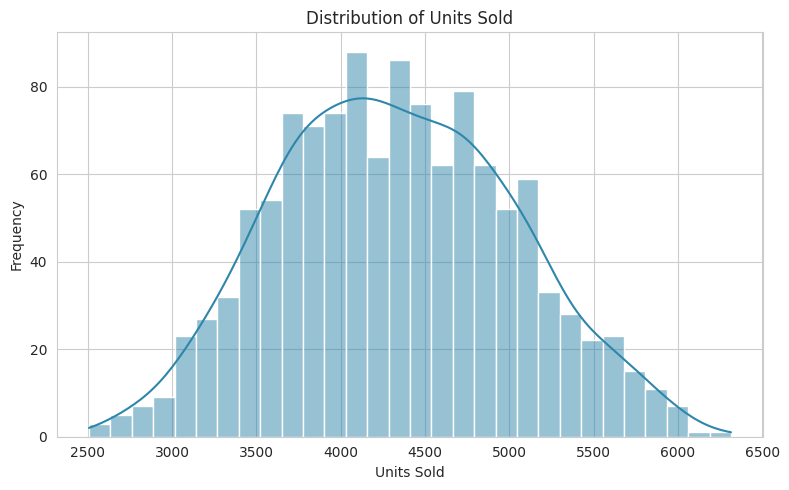

In [10]:
plt.figure()
sns.histplot(df["Units_Sold"], bins=30, kde=True)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

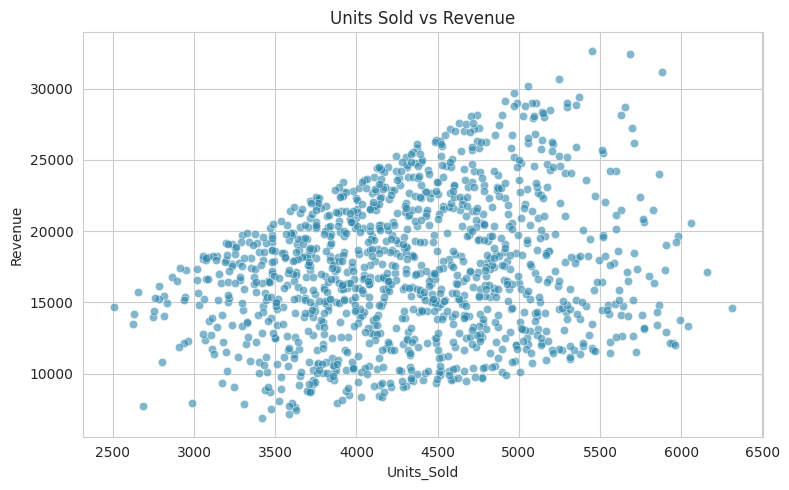

In [11]:
plt.figure()
sns.scatterplot(
    data=df,
    x="Units_Sold",
    y="Revenue",
    alpha=0.6
)
plt.title("Units Sold vs Revenue")
plt.tight_layout()
plt.show()

In [12]:
daily_demand = df.groupby("Date")["Units_Sold"].sum()
daily_demand

,Units_Sold
Date,
2022-01-01,3494
2022-01-02,3649
2022-01-03,4673
2022-01-04,4338
2022-01-05,4311
...,...
2025-04-10,5359
2025-04-11,5560
2025-04-12,5134


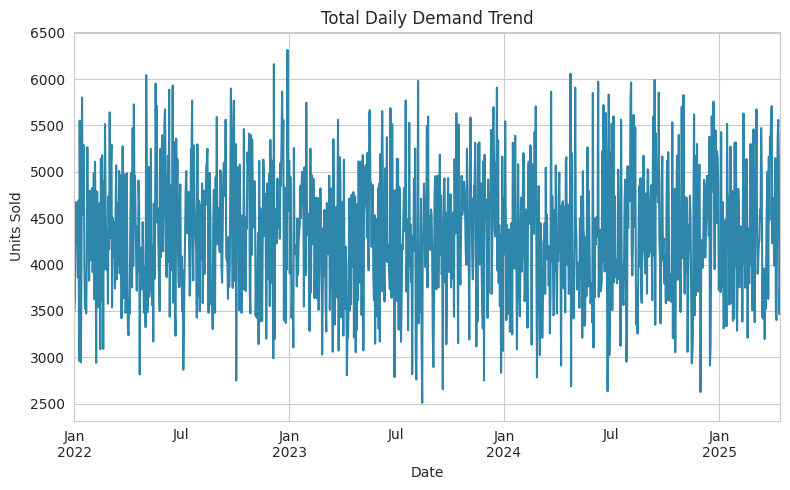

In [13]:

plt.figure()
daily_demand.plot()
plt.title("Total Daily Demand Trend")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


In [14]:
region_demand = df.groupby("Region")["Units_Sold"].mean().sort_values()
region_demand

,Units_Sold
Region,
Asia,4315.860190
North America,4328.997423
Europe,4330.612821


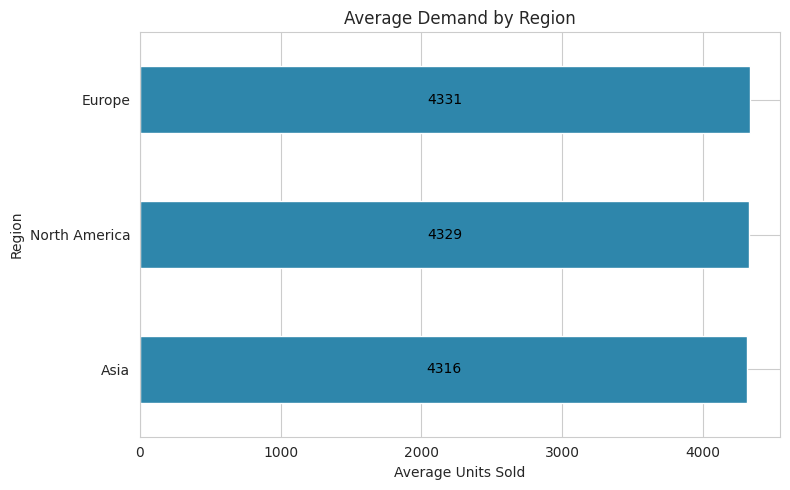

In [15]:
plt.figure(figsize=(8, 5))
ax = region_demand.plot(kind="barh")

plt.title("Average Demand by Region")
plt.xlabel("Average Units Sold")

# Add labels in the middle of each bar
for i, v in enumerate(region_demand.values):
    ax.text(
        v / 2,                 # middle of bar (x position)
        i,                     # y position
        f"{v:.0f}",            # label text
        va="center",
        ha="center",
        color="black",
        fontsize=10
    )

plt.tight_layout()
plt.show()


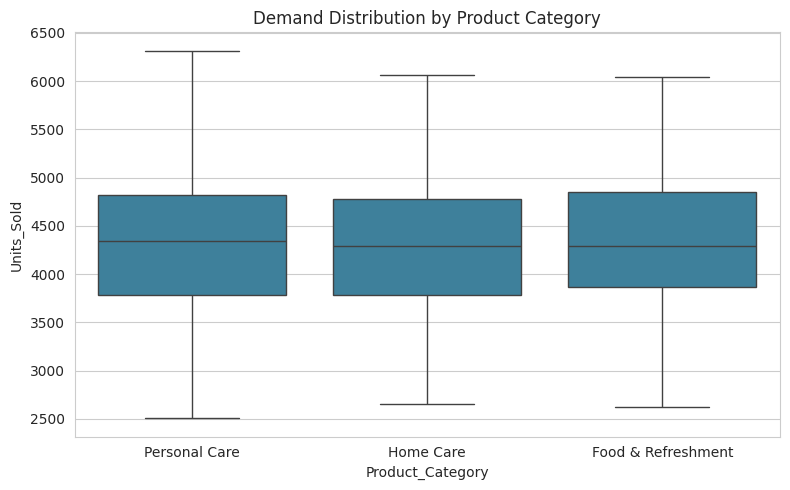

In [16]:
plt.figure()
sns.boxplot(
    data=df,
    x="Product_Category",
    y="Units_Sold"
)
plt.title("Demand Distribution by Product Category")
plt.tight_layout()
plt.show()


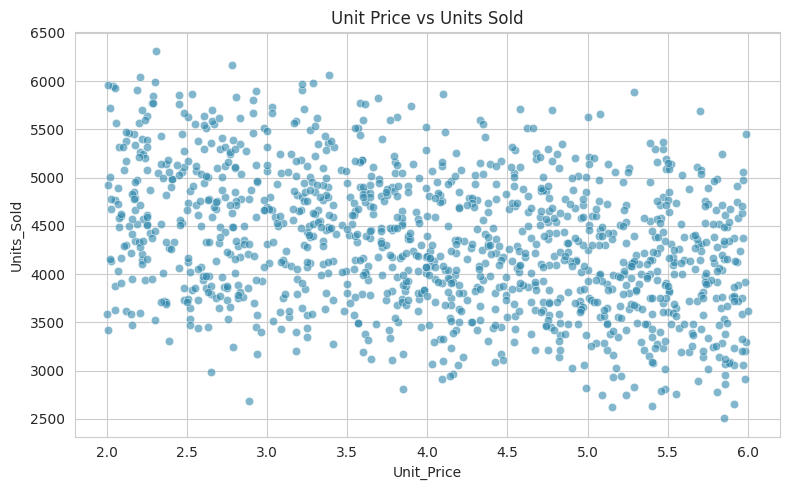

In [17]:
plt.figure()
sns.scatterplot(
    data=df,
    x="Unit_Price",
    y="Units_Sold",
    alpha=0.6
)
plt.title("Unit Price vs Units Sold")
plt.tight_layout()
plt.show()


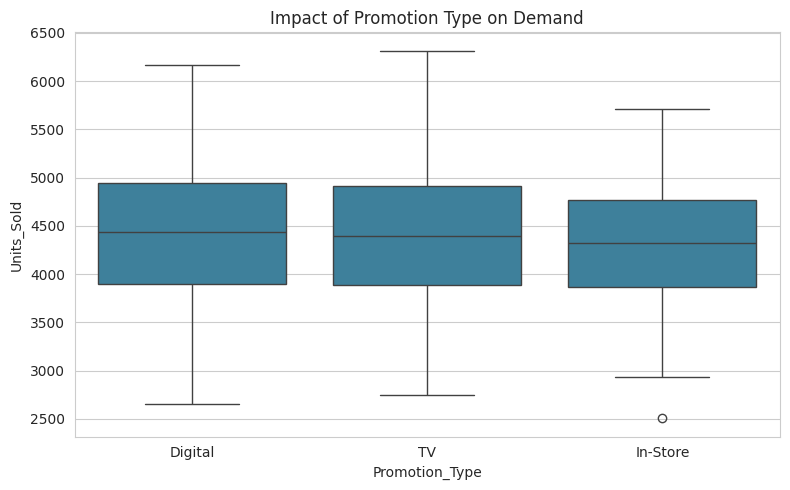

In [18]:
plt.figure()
sns.boxplot(
    data=df,
    x="Promotion_Type",
    y="Units_Sold"
)
plt.title("Impact of Promotion Type on Demand")
plt.tight_layout()
plt.show()

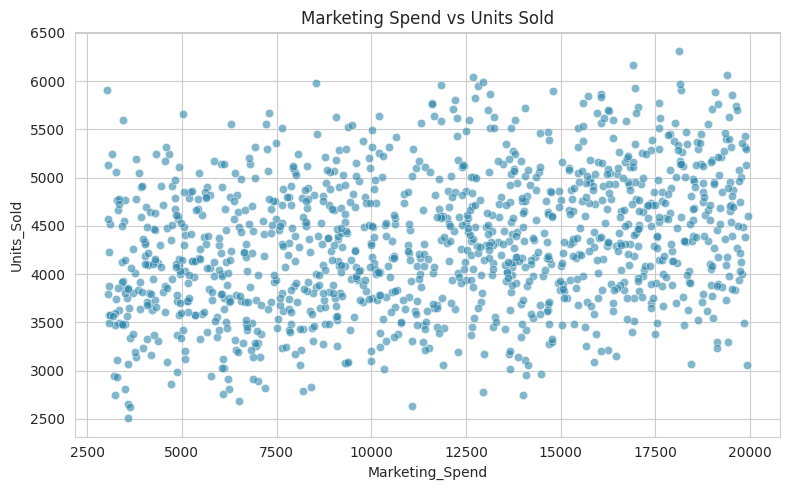

In [19]:
plt.figure()
sns.scatterplot(
    data=df,
    x="Marketing_Spend",
    y="Units_Sold",
    alpha=0.6
)
plt.title("Marketing Spend vs Units Sold")
plt.tight_layout()
plt.show()

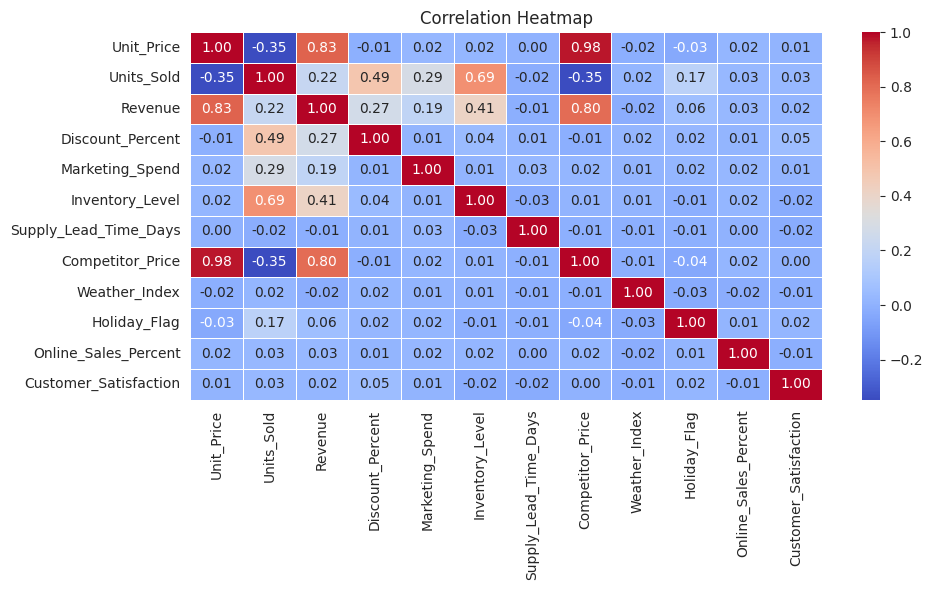

In [20]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 2. Feature Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Time features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Is_Weekend"] = df["DayOfWeek"].isin([5, 6]).astype(int)

In [23]:
# Lag features (after sorting!)
df["Lag_1"] = df["Units_Sold"].shift(1)
df["Lag_7"] = df["Units_Sold"].shift(7)
df["Rolling_Mean_7"] = df["Units_Sold"].rolling(7).mean()


In [24]:
df = df.dropna().reset_index(drop=True)
print(df.shape)

(743, 27)


In [25]:
split_index = int(len(df) * 0.8)

train_df = df.iloc[:split_index]
test_df  = df.iloc[split_index:]

print(train_df.shape, test_df.shape)


(594, 27) (149, 27)


In [26]:
cat_cols = [
    "Region", "Country", "Product_Category",
    "Brand", "Product_Name", "Promotion_Type"
]

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    encoders[col] = le


/tmp/ipython-input-706511532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col] = le.fit_transform(train_df[col])
/tmp/ipython-input-706511532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col] = le.transform(test_df[col])
/tmp/ipython-input-706511532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [27]:
features = [
    "Region", "Country", "Product_Category", "Brand", "Product_Name",
    "Unit_Price", "Discount_Percent", "Promotion_Type",
    "Marketing_Spend", "Inventory_Level", "Supply_Lead_Time_Days",
    "Competitor_Price", "Weather_Index", "Holiday_Flag",
    "Online_Sales_Percent", "Customer_Satisfaction",
    "Year", "Month", "Week", "DayOfWeek", "Is_Weekend",
    "Lag_1", "Lag_7", "Rolling_Mean_7"
]

In [28]:
X_train = train_df[features]
y_train = train_df["Units_Sold"]

X_test = test_df[features]
y_test = test_df["Units_Sold"]

In [29]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,
                      n_jobs=-1, random_state=42)

In [30]:
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


Random Forest Performance
MAE: 227.85005806081804
RMSE: 285.88593661493786
R2: 0.838513823089599


In [31]:
importances = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

importances.head(10)


,0
Inventory_Level,0.506519
Discount_Percent,0.192841
Unit_Price,0.076007
Marketing_Spend,0.072291
Competitor_Price,0.068988
Rolling_Mean_7,0.011637
Lag_7,0.008554
Weather_Index,0.007914
Lag_1,0.007757
Customer_Satisfaction,0.007582


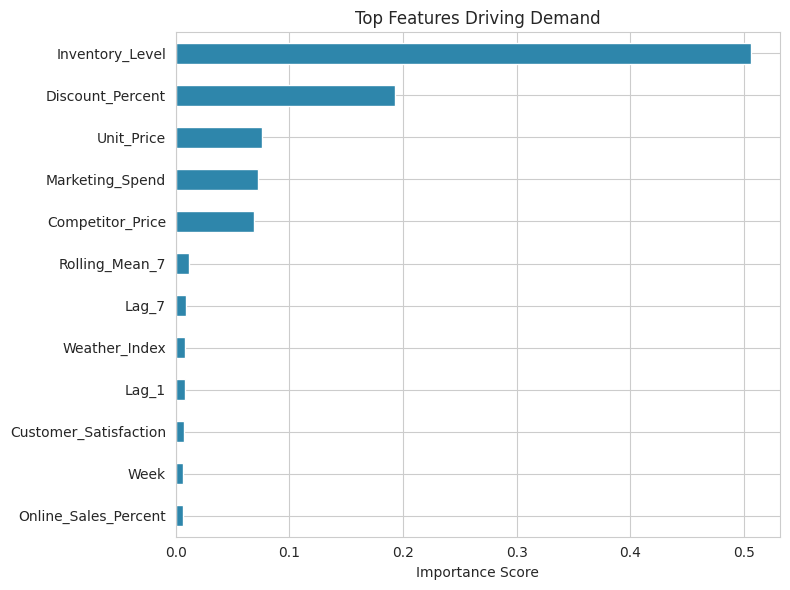

In [32]:
importances = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
importances.head(12).sort_values().plot(kind="barh")
plt.xlabel("Importance Score")
plt.title("Top Features Driving Demand")
plt.tight_layout()
plt.show()


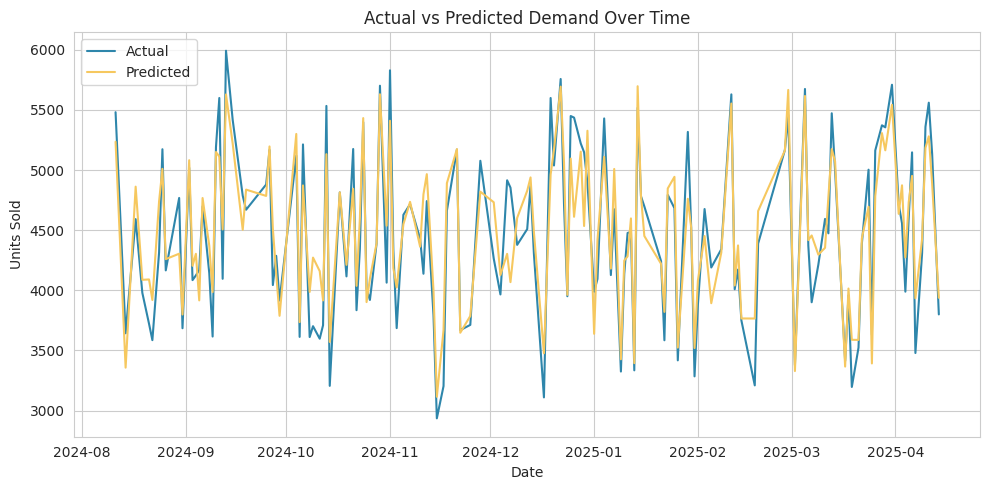

In [33]:
comparison_df = pd.DataFrame({
    "Date": test_df["Date"],
    "Actual": y_test.values,
    "Predicted": y_pred
}).set_index("Date")

plt.figure(figsize=(10,5))
plt.plot(comparison_df.index, comparison_df["Actual"], label="Actual")
plt.plot(comparison_df.index, comparison_df["Predicted"], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


In [34]:
!pip install flask pyngrok
!pip install streamlit pyngrok joblib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.6 MB/s eta 0:00:00
